In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

In [ ]:
questions = pd.read_csv("/content/questions_after_testing_new_final.csv")
summary = pd.read_csv("/content/summary_after_testing_new_final.csv")

In [ ]:
summary = summary.dropna()

In [ ]:
summary = summary[summary['question'] == "Опиши картину"]

In [ ]:
questions['result_num'] = questions['result'].map({True: 1, False: 0})
questions['true_result'] = questions['is_hallucinated'].map({True: 1, False: 0})

In [ ]:
summary['result_num'] = summary['result'].str.lower().map({"hallucinated": 1, "faithful": 0})
summary['true_result'] = summary['is_hallucinated'].str.lower().map({"hallucinated": 1, "hallucinated ": 1, "hallucination": 1, "faithful ": 0, "faithful": 0})

In [ ]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               203 non-null    int64 
 1   session_id       203 non-null    object
 2   context          203 non-null    object
 3   question         203 non-null    object
 4   answer           203 non-null    object
 5   is_hallucinated  203 non-null    object
 6   result           203 non-null    object
 7   created_at       203 non-null    object
 8   result_num       203 non-null    int64 
 9   true_result      203 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 17.4+ KB


In [ ]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       58 non-null     int64 
 1   id               58 non-null     int64 
 2   context          58 non-null     object
 3   question         58 non-null     object
 4   answer           58 non-null     object
 5   is_hallucinated  58 non-null     bool  
 6   result           58 non-null     bool  
 7   session_id       58 non-null     object
 8   created_at       58 non-null     object
 9   result_num       58 non-null     int64 
 10  true_result      58 non-null     int64 
dtypes: bool(2), int64(4), object(5)
memory usage: 4.3+ KB


In [ ]:
report = classification_report(questions['true_result'], questions['result_num'])
print(report)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        39
           1       0.69      0.95      0.80        19

    accuracy                           0.84        58
   macro avg       0.83      0.87      0.84        58
weighted avg       0.88      0.84      0.85        58



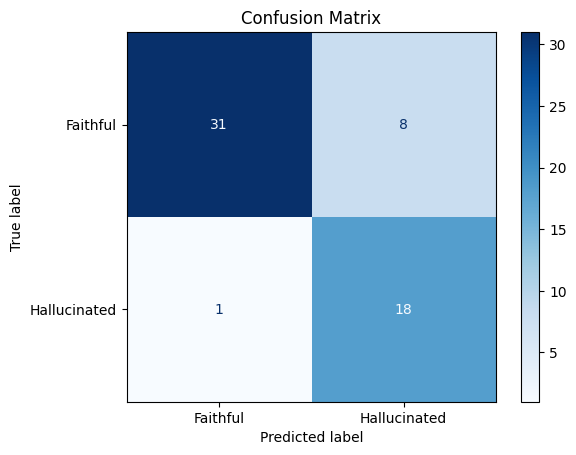

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = questions['true_result']
y_pred = questions['result_num']

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Faithful", "Hallucinated"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(summary['true_result'], summary['result_num'])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.82      0.89       125
           1       0.77      0.99      0.87        78

    accuracy                           0.88       203
   macro avg       0.88      0.90      0.88       203
weighted avg       0.91      0.88      0.88       203



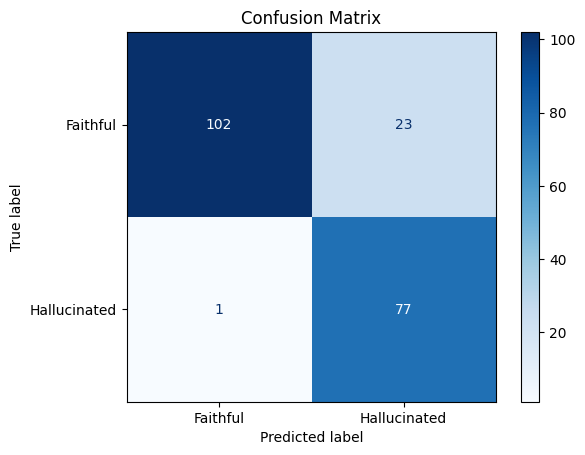

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = summary['true_result']
y_pred = summary['result_num']

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Faithful", "Hallucinated"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
df_all = pd.concat([questions, summary], ignore_index=True)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       58 non-null     float64
 1   id               261 non-null    int64  
 2   context          261 non-null    object 
 3   question         261 non-null    object 
 4   answer           261 non-null    object 
 5   is_hallucinated  261 non-null    object 
 6   result           261 non-null    object 
 7   session_id       261 non-null    object 
 8   created_at       261 non-null    object 
 9   result_num       261 non-null    int64  
 10  true_result      261 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 22.6+ KB


In [ ]:
report = classification_report(df_all['true_result'], df_all['result_num'])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       164
           1       0.75      0.98      0.85        97

    accuracy                           0.87       261
   macro avg       0.87      0.90      0.87       261
weighted avg       0.90      0.87      0.88       261



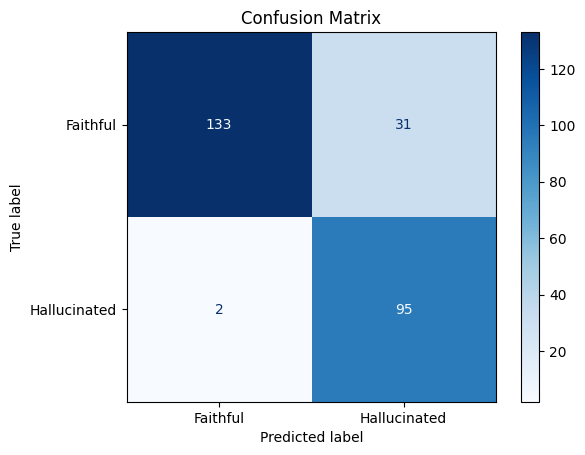

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = df_all['true_result']
y_pred = df_all['result_num']

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Faithful", "Hallucinated"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
filtered_df = df_all[df_all['true_result'] == 1]
value_counts_df = filtered_df['context'].value_counts().reset_index()

value_counts_df.columns = ['text', 'count']

value_counts_df['length'] = value_counts_df['text'].apply(lambda x: len(str(x)))

print(value_counts_df)

                                                 text  count  length
0   ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож...     11     191
1   Гатауллина Диана / mojno.prosto.di \n\nТриптих...     10    2296
2   Лада Ладная\n«Чего не знаю»\nИнсталляция, вода...      9    1533
3   Кристина ШилинаСерия «Север»«Сияние», «Вышка»,...      8    2015
4   Эльвира Хусаинова \n«Там, только там»\n\nИнста...      7    1868
5   САША МЕЛЬНИКОВА\nМультисдисциплинарный художни...      6     611
6   Саша Корсак и Nik Stencil\n«Шкаф»\nКерамика, ф...      6    1668
7   Кристина Бабина\n«Свет мой, зеркальце, скажи…»...      6    4549
8   Кристина Шилина\nСерия «Север»\n«Звезда»\nТкан...      4    1819
9   АЛЕКСАНДР КУЗЬМИН\nМультидисциплинарный художн...      4     266
10  Александра Жернова\n«Туменова София Ермаковна»...      3    2381
11  Артём Долгих\n«Минимальная монументальность ма...      3    3226
12  «ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис...      3     397
13  Жаслан Тасымов \n«Фасадный сло

In [ ]:
df_all.to_csv("summary_questions_300.csv")